# 10. Dot product and convolution

In [1]:
import numpy as np
from matplotlib import pyplot as plt

Here are a few ways to compute dot products using numpy.

In [4]:
#2 vectors of random numbers
a = np.random.randn(10)
b = np.random.randn(10)

#initialize temporary matrix
pointwise_result = np.zeros(len(a))

for ii in range(len(a)):
    pointwise_result[ii] = a[ii] * b[ii]
    
print(np.sum(pointwise_result))

# alternatively
print(np.sum(a*b))

# better yet
print(np.dot(a,b))

# @ symbol means inner product
print(a@b)

3.5226863969631466
3.5226863969631466
3.522686396963146
3.522686396963146


### Figure 10.2

[Text(0.5, 1.0, 'C')]

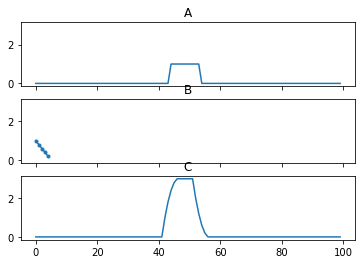

In [8]:
#impulse function; all zeros with one 1 in the middle
impfun = np.zeros(100)
impfun[49] = 1

#figure in book uses the following boxcar function
impfun[44:54] = 1

kernel = np.array([1,0.8,.6,.4,.2])

#convolution result using built-in numpy function
numpy_conv_result = np.convolve(impfun, kernel, mode="same")

fig, ax = plt.subplots(3, 1, sharex='all', sharey='all')

#plot signal
ax[0].plot(impfun)
ax[0].set(title='A')

#plot kernel
ax[1].plot(kernel,'.-')
ax[1].set(title='B')

#plot result of convolution
ax[2].plot(numpy_conv_result)
ax[2].set(title='C')

### Figure 10.4
Compute convolution in different ways and plot

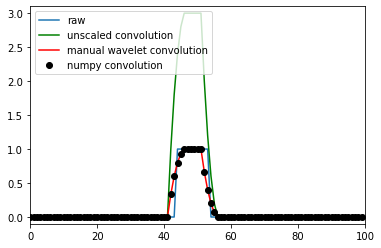

In [15]:
#zero-pad our signal
zz = np.zeros(len(kernel)-1)
dat4conv = np.concatenate([zz, impfun, zz])

half_of_kernel_size = int(np.ceil((len(kernel) -1)/2))

#initialize convolution output
convolution_result = np.zeros(len(impfun)+len(kernel)-1)

#run convolution (kernel is flipped backwards)
for ti in range(len(convolution_result)-half_of_kernel_size):
    convolution_result[ti] = np.sum(dat4conv[ti:ti+len(kernel)]*kernel[::-1])

# cut off edges
convolution_result = convolution_result[half_of_kernel_size:-half_of_kernel_size]

plt.figure()
plt.plot(impfun)
plt.plot(convolution_result, 'g')
plt.plot(convolution_result/np.sum(kernel), 'r')
plt.plot(numpy_conv_result/np.sum(kernel), 'ko')
plt.axis([0,100,-.1,3.1])
plt.legend(["raw","unscaled convolution","manual wavelet convolution","numpy convolution"],
           loc='upper left')